# Інші (різні) приклади

## 1. Карти 
Детальніше можна почитати в [галереї діаграм](https://www.python-graph-gallery.com/288-map-background-with-folium) та документації до бібліотеки [Folium](https://python-visualization.github.io/folium/quickstart.html)

In [ ]:
# встановлюємо необхідний пакет
!pip install folium

In [ ]:
# імпорт бібліотеки
import folium

# задаємо координати центру ділянки карти та початковий масштаб
map = folium.Map(location=[49.590033669823875, 34.550941823527936], zoom_start=16)

# задаємо текст спливаючої підказки
tooltip = "Натисни щоб дізнатись більше!"

# обводимо колом наш коледж:)
folium.Circle(
    radius=60,
    location=[49.58771238565784, 34.54304621524288], 
    popup="Полтавський політехнічний коледж",
    color="crimson",
    fill=True,
    fill_color="#3186cc"
).add_to(map)

# ставимо маркер на будівлі коледжа:)
folium.Marker(
    [49.58771238565784, 34.54304621524288], 
    popup="<h3>Полтавський політехнічний коледж</h3><p><img src='https://lh5.googleusercontent.com/p/AF1QipOlUnNjdQfAK43eX9D2GNeUVoBSONhfGbwsT12S=w408-h272-k-no'/><br/><br/><a href='http://www.polytechnic.poltava.ua/' target='blank'>Офіційний сайт...</a></p>", 
    tooltip=tooltip,
    icon=folium.Icon(color="green", icon="info-sign")
).add_to(map)

# виводимо карту
map

## 2. QR-коди

In [ ]:
# встановлюємо необхідний пакет
!pip install "qrcode[pil]"

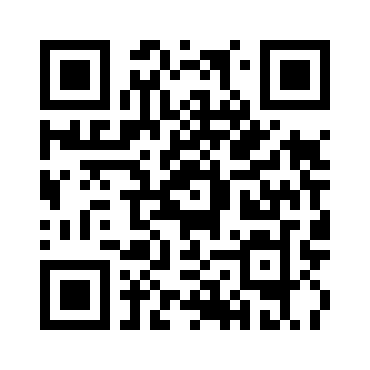

In [ ]:
# імпорт бібліотеки
import qrcode

# генеруємо код для сайту коледжу:)
img = qrcode.make('http://polytechnic.poltava.ua')

# виводимо код
img

## 3. Математичні вирази

Детальніше про про математичні вирази в Markdown читайте [тут](https://jupyterbook.org/content/math.html)

$y=x^2$
 
$e^{i\pi} + 1 = 0$
 
$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$
 
$\frac{n!}{k!(n-k)!} = {n \choose k}$
 
Окремий математичний блок (вирівнювання по центру):

$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$

Окремий математичний блок:
 
$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$



## 4. Робота з камерою

In [ ]:
# імпорт бібліотек
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# функція отримання знімку (використовуємо JavaScript)
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // масштабуємо зображення
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // чекаємо натиснення на кнопку
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


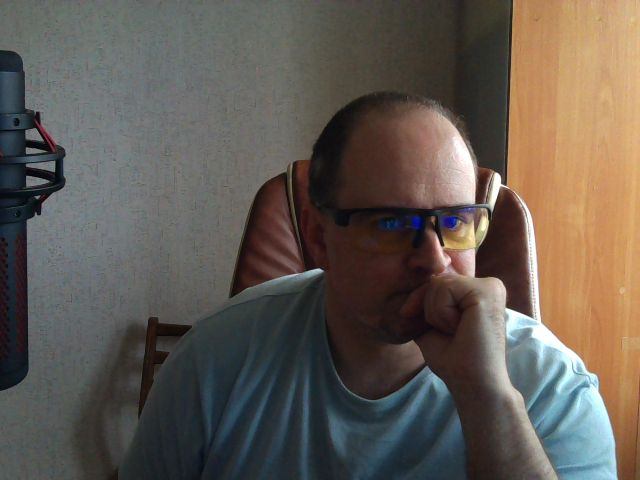

In [ ]:
# імпорт бібліотек
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # відображення зображення
  display(Image(filename))
except Exception as err:
  # немає камери
  # не довірений блокнот
  print(str(err))

## 5. Форми

In [ ]:
# встановлюємо необхідний пакет
!pip install datetime

In [3]:
#@title Демо форма

Прізвище = '\u0406\u0432\u0430\u043D\u043E\u0432 \u0406\u0432\u0430\u043D \u0406\u0432\u0430\u043D\u043E\u0432\u0438\u0447' #@param {type:"string"}
Місто = 'Полтава' #@param ["Полтава", "Київ", "Харків"]
Дата_народження = '1972-05-12' #@param {type:"date"}
Кількість_дітей =  5#@param {type:"number"}
Задоволеність_сервісом = 4 #@param {type:"slider", min:1, max:5, step:1}
Вища_освіта = True #@param {type:"boolean"}


### Віджети Jupiter

In [9]:
# імпорт бібліотек
from datetime import date
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

# додаємо до віджета кнопку й декларуємо результат (output)
button = widgets.Button(description="інформація з форми")
output = widgets.Output()

# обчислюємо вік людини тощо
f_date = datetime.strptime(Дата_народження, '%Y-%m-%d')
l_date = date.today()
result = l_date.year - f_date.year
edu = "немає"
if Вища_освіта:
  edu = "так"

# обробник події
def on_button_clicked(b):
  # відображаємо результат
  with output:    
    print(f"\n{Прізвище}\nнародився {Дата_народження}, {result} повних років\nпроживає у місті {Місто}, має {Кількість_дітей} дітей\nзадоволений сервісом на {Задоволеність_сервісом} з 5\nвища освіта - {edu}")

button.on_click(on_button_clicked)
display(button, output)

Button(description='інформація з форми', style=ButtonStyle())

Output()